# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

In [5]:
df.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

##### Variables categoricas

Se empezara por tratar la variable categorica, posterior se trataran las numericas.
La variable num_doors dada su naturaleza categorica se tratara usando la moda

In [6]:
df.num_doors.mode()

0    four
dtype: object

In [7]:
df.num_doors.fillna(df.num_doors.mode()[0], inplace=True)

In [8]:
df.loc[:,'num_doors'].isna().sum()

0

##### Variables numericas

In [9]:
import seaborn as sb

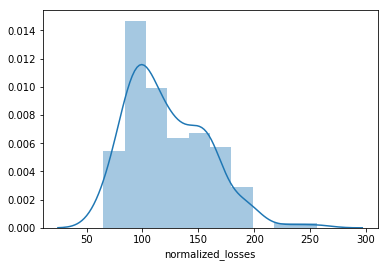

In [10]:
sb.distplot(df["normalized_losses"].dropna())

In [11]:
print('Promedio: ',df["normalized_losses"].mean())
print('Mediana: ',df["normalized_losses"].median())

('Promedio: ', 122.0)
('Mediana: ', 115.0)


Ambas son adecuadas ya que tiene  la misma probabilidad de ocurrencia

In [12]:
df.normalized_losses.fillna(df.normalized_losses.median(), inplace=True) #mediana

In [13]:
df["normalized_losses"].isna().sum()

0

variable Bore

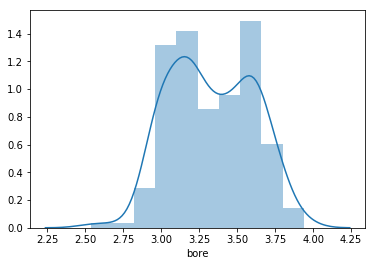

In [14]:
sb.distplot(df["bore"].dropna())

In [15]:
print('Promedio: ',df["bore"].mean())
print('Mediana: ',df["bore"].median())

('Promedio: ', 3.3297512437810957)
('Mediana: ', 3.31)


Ambas son adecuadas ya que tiene  la misma probabilidad de ocurrencia

In [16]:
df.bore.fillna(df.bore.mean(), inplace=True)

In [17]:
df["bore"].isna().sum()

0

Variable Stroke

In [18]:
pd.pivot_table(df, index='stroke', aggfunc='count').loc[:,'aspiration']

stroke
2.07     1
2.19     2
2.36     1
2.64    11
2.68     2
2.76     1
2.80     2
2.87     1
2.90     3
3.03    14
3.07     6
3.08     2
3.10     2
3.11     6
3.12     1
3.15    14
3.16     1
3.19     6
3.21     1
3.23    14
3.27     6
3.29     9
3.35     9
3.39    13
3.40    20
3.41     6
3.46     8
3.47     4
3.50     6
3.52     5
3.54     4
3.58     6
3.64     5
3.86     4
3.90     3
4.17     2
Name: aspiration, dtype: int64

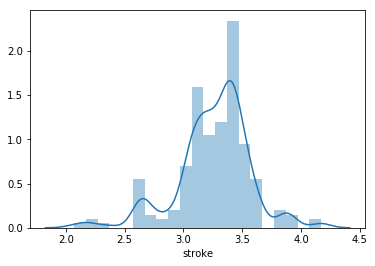

In [19]:
sb.distplot(df["stroke"].dropna())

In [20]:
print('Promedio: ',df["stroke"].mean())
print('Mediana: ',df["stroke"].median())
print('Moda: ',df["stroke"].mode())

('Promedio: ', 3.2554228855721337)
('Mediana: ', 3.29)
('Moda: ', 0    3.4
dtype: float64)


Por la naturaleza de la variable se empleara la moda

In [21]:
df.stroke.fillna(df.stroke.mode()[0], inplace=True)

In [22]:
df.loc[:,'stroke'].isna().sum()

0

variables horsepower y peakrpm

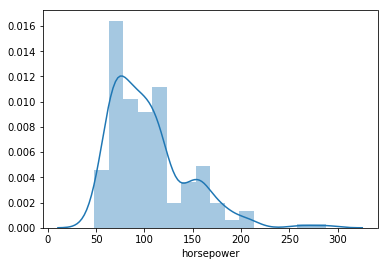

In [23]:
sb.distplot(df["horsepower"].dropna())

In [24]:
print('Promedio: ',df["horsepower"].mean())
print('Mediana: ',df["horsepower"].median())


('Promedio: ', 104.25615763546799)
('Mediana: ', 95.0)


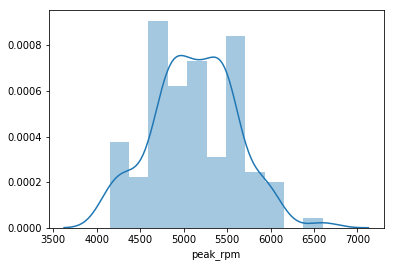

In [25]:
sb.distplot(df["peak_rpm"].dropna())

In [26]:
print('Promedio: ',df["peak_rpm"].mean())
print('Mediana: ',df["peak_rpm"].median())


('Promedio: ', 5125.369458128079)
('Mediana: ', 5200.0)


La media  parece ser un mejor indicador para reemplazar los NAs

In [27]:
df.peak_rpm.fillna(df.peak_rpm.mean(), inplace=True)
df.horsepower.fillna(df.horsepower.mean(), inplace=True)

In [28]:
print('horsepower NAs : ',df["horsepower"].isna().sum())
print('peak_rpm NAs : ',df["peak_rpm"].isna().sum())

('horsepower NAs : ', 0)
('peak_rpm NAs : ', 0)


Variable precio

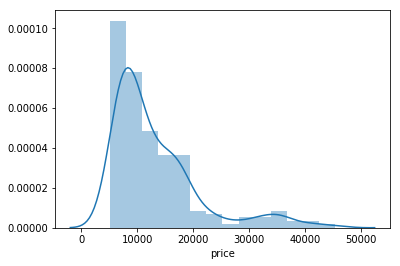

In [29]:
sb.distplot(df["price"].dropna())

In [30]:
print('Promedio: ',df["price"].mean())
print('Mediana: ',df["price"].median())

('Promedio: ', 13207.129353233831)
('Mediana: ', 10295.0)


Se empleara la mediana para los NAS del precio

In [31]:
df.price.fillna(df.price.median(), inplace=True)

In [32]:
print('NAs precio: ',df["price"].isna().sum())

('NAs precio: ', 0)


# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the nominal features

In [33]:
# define X and y
feature_cols =['price','make','fuel_type','aspiration','num_doors','body_style','drive_wheels'
             ,'engine_location','engine_type','num_cylinders','fuel_system']
y = df['price']
X = df.drop(feature_cols , axis=1)

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_df = clf.predict(X_test)


In [34]:
np.sqrt(mean_squared_error(y_pred_df, y_test))

2086.940448283539

# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

In [35]:
df2 = pd.get_dummies(df)

In [36]:
y = df2['price']
X = df2.drop(['price'], axis=1)

In [37]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [38]:
X_train.columns

Index([u'symboling', u'normalized_losses', u'wheel_base', u'length', u'width',
       u'height', u'curb_weight', u'engine_size', u'bore', u'stroke',
       u'compression_ratio', u'horsepower', u'peak_rpm', u'city_mpg',
       u'highway_mpg', u'make_alfa-romero', u'make_audi', u'make_bmw',
       u'make_chevrolet', u'make_dodge', u'make_honda', u'make_isuzu',
       u'make_jaguar', u'make_mazda', u'make_mercedes-benz', u'make_mercury',
       u'make_mitsubishi', u'make_nissan', u'make_peugot', u'make_plymouth',
       u'make_porsche', u'make_renault', u'make_saab', u'make_subaru',
       u'make_toyota', u'make_volkswagen', u'make_volvo', u'fuel_type_diesel',
       u'fuel_type_gas', u'aspiration_std', u'aspiration_turbo',
       u'num_doors_four', u'num_doors_two', u'body_style_convertible',
       u'body_style_hardtop', u'body_style_hatchback', u'body_style_sedan',
       u'body_style_wagon', u'drive_wheels_4wd', u'drive_wheels_fwd',
       u'drive_wheels_rwd', u'engine_location_front'

In [39]:
X_train.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,num_cylinders_twelve,num_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
124,3,115.0,95.9,173.2,66.3,50.2,2818,156,3.59,3.86,...,0,0,0,0,0,0,0,0,1,0
181,-1,115.0,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,...,0,0,0,0,0,0,0,1,0,0
154,0,81.0,95.7,169.7,63.6,59.1,2290,92,3.05,3.03,...,0,0,0,1,0,0,0,0,0,0
53,1,113.0,93.1,166.8,64.2,54.1,1945,91,3.03,3.15,...,0,0,0,1,0,0,0,0,0,0
94,1,128.0,94.5,165.3,63.8,54.5,1951,97,3.15,3.29,...,0,0,0,1,0,0,0,0,0,0


In [40]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

In [41]:
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_df = clf.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(y_pred_df, y_test))

2320.9350119473443

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

## Binary Encoder

In [43]:
import category_encoders as ce

In [47]:
numerico=['symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore'
           ,'stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
categorico=['make','fuel_type','aspiration','num_doors','body_style','drive_wheels'
             ,'engine_location','engine_type','num_cylinders','fuel_system']

In [50]:
num = ce.BinaryEncoder().fit_transform(df.drop(numerico, axis=1))

In [53]:
df_cat = pd.concat([num, df.drop(categorico, axis=1)], axis=1)


In [54]:
df_cat.head()

,make_0,make_1,make_2,make_3,make_4,make_5,fuel_type_0,fuel_type_1,aspiration_0,aspiration_1,...,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,0,0,0,0,1,0,1,0,1,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,0,0,0,0,0,1,0,1,0,1,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,0,0,0,0,0,1,0,1,0,1,...,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,0,0,0,0,1,0,0,1,0,1,...,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,0,0,0,0,1,0,0,1,0,1,...,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [55]:
y = df_cat['price']
X = df_cat.drop(['price'], axis=1)

In [56]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [57]:
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_df = clf.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_pred_df, y_test))

2388.1150666705375

## Helmert Coding

In [59]:
num1 = ce.HelmertEncoder().fit_transform(df.drop(numerico, axis=1))

In [61]:
df_cat2 = pd.concat([cat, df.drop(categorico, axis=1)], axis=1)

In [62]:
df_cat2.head()

,make_0,make_1,make_2,make_3,make_4,make_5,fuel_type_0,fuel_type_1,aspiration_0,aspiration_1,...,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,0,0,0,0,1,0,1,0,1,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,0,0,0,0,0,1,0,1,0,1,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,0,0,0,0,0,1,0,1,0,1,...,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,0,0,0,0,1,0,0,1,0,1,...,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,0,0,0,0,1,0,0,1,0,1,...,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [63]:
y = df_cat2['price']
X = df_cat2.drop(['price'], axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [65]:
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_df = clf.predict(X_test)

In [66]:
np.sqrt(mean_squared_error(y_pred_df, y_test))

1979.26985569432